# Reddit Post Popularity Tagger

*This assignment attempts to use text classification on reddit posts to see how accurate the classifier is in determining whether a given post on the subreddit "Today I Learned (TIL)" is popular or not (with popular meaning the post has more than 10 comments).*

**Data:** existing dataset of 10,000 reddit posts in the subreddit "Today I Learned"

**Document:** each post

**Two classes of data:** Popular vs. Not Popular (a popular post has more than 10 comments)

**Tokens/features of each document:** 50 most frequently occurring words across all posts (posts are then classified according to whether these common words appear in the document)

**Eliminating tokens:** eliminate stopwords, punctuation, low frequency tokens, and some part-of-speech

### 1. Fetch data

In [1]:
import nltk
import pandas as pd

In [2]:
# import Reddit dataset to Pandas dataframe
reddit = pd.read_csv("data/reddit_til_2500.csv", encoding="utf-8", dtype="unicode")
reddit.drop(labels = ['Column'], axis=1, inplace=True)
reddit

,created_utc,title,num_comments
0,1422659220,TIL that Va police have been taking pics of ca...,0
1,1428792758,TIL Adam Vinatieri has been playing in the NFL...,2
2,1425501165,TIL the Peter Pan guy got married in 2009,1
3,1416346965,TIL the Guinness family owner of Guinness Brew...,2
4,1419708125,TIL MLK blamed white moderates for slowing up ...,14
5,1424986326,TIL Martin Luther King Jr's first name is actu...,1
6,1322010276,Mixology » Tootsie Roll Cocktail…. umm yumm,0
7,1444330538,TIL Bernie Sanders had protestors arrested out...,0
8,1445537854,"TIL that in the early days of baseball, player...",627
9,1278213707,that the US Government exploded a Hydrogen Bom...,2


### 2. Split data into classes & process text

In [3]:
# a function for tagging each post with a label for whether
# it is popular or not

def popular_tag(comments):
    # define a popular post as a post with more than 10 comments
    if int(comments.strip()) >= 10:
        return 'popular'
    else:
        return 'not popular'

In [4]:
# get a list of labeled reddit posts

labeled_posts = []
for row in reddit.itertuples():
    # tokenize each document
    labeled_posts += [(row[2], popular_tag(row[3]))]

In [5]:
# a function for further processing each post by
# filtering words according to part of speech

def POS_processor(text):
    features = []
    tokens = nltk.word_tokenize(text)
    pos_tagged_tokens = nltk.pos_tag(tokens) # POS tagging
    for (token, pos_tag) in pos_tagged_tokens:
        # keep only words that are tagged as adjective, verb, or noun
        if (pos_tag.startswith("N") or pos_tag.startswith("V") or pos_tag.startswith("J")):
            features.append(token)
    return features

In [6]:
# grab all posts and store them in a list
all_posts = []
for row in reddit.itertuples():
    all_posts.append(row[2])

# further process posts by removing words by
# performing part of speech tagging
all_words = []
for post in all_posts:
    all_words.append(POS_processor(post))

### 3. Create tokens

In [7]:
# create a list of the most common words across all posts

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append("til") #remove TIL

temp = []
all_words_processed = [item for post in all_words for item in post]

# filter out stopwords and non-alpha words
words_freq = nltk.FreqDist(word.lower() 
                          for word in all_words_processed
                          if word.isalpha() and word.lower() not in stop_words)

# consists of 50 most common words
word_features = [word for (word, feature) in words_freq.most_common(50)]

text = nltk.Text(word_features)
fdist = text.vocab()
# print(fdist)
# words_freq.most_common(100)

### 4. Featurize posts & create labeled documents

In [8]:
# create one feature per word in each post, with a binary value, 
# indicating whether the document contains the word or not

def post_features(post):
    features = dict()
    for word in word_features:
        features[word] = (word.lower() in post)
    return features # boolean for whether word appears in document or not

In [9]:
# generate a list of documents that contain a 
# dictionary of features for each unique post
labeled_documents = [(post_features(post), category) for (post, category) in labeled_posts]

In [10]:
# randomize the post order
import random
random.shuffle(labeled_documents)

In [11]:
labeled_documents # a list of all the featurized posts

[({'america': False,
   'american': False,
   'amp': False,
   'black': False,
   'british': False,
   'called': False,
   'company': False,
   'day': False,
   'death': False,
   'died': False,
   'earth': False,
   'first': False,
   'free': False,
   'game': False,
   'get': False,
   'great': False,
   'internet': False,
   'king': False,
   'largest': False,
   'learned': False,
   'life': False,
   'made': False,
   'make': False,
   'man': False,
   'movie': False,
   'name': False,
   'named': False,
   'new': False,
   'online': False,
   'people': False,
   'played': False,
   'real': False,
   'show': False,
   'song': False,
   'space': False,
   'time': False,
   'times': False,
   'today': False,
   'us': False,
   'use': False,
   'used': False,
   'video': False,
   'war': False,
   'water': False,
   'white': False,
   'women': False,
   'word': False,
   'world': False,
   'year': True,
   'years': False},
  'popular'),
 ({'america': False,
   'american': False,
   'a

### 5. Train classifier to classify data & evaluate accuracy

In [12]:
# divide the list of labeled posts into training set and test set
# where the former will be used to train the classifier
train_set, test_set = labeled_documents[:-500], labeled_documents[-500:]

# build Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# classify test set
cnt = 1
for row in test_set:
    print("test_post", cnt, ":", classifier.classify(row[0]))
    cnt += 1

test_post 1 : not popular
test_post 2 : not popular
test_post 3 : not popular
test_post 4 : not popular
test_post 5 : not popular
test_post 6 : popular
test_post 7 : not popular
test_post 8 : not popular
test_post 9 : popular
test_post 10 : not popular
test_post 11 : not popular
test_post 12 : not popular
test_post 13 : not popular
test_post 14 : not popular
test_post 15 : not popular
test_post 16 : not popular
test_post 17 : not popular
test_post 18 : not popular
test_post 19 : not popular
test_post 20 : not popular
test_post 21 : not popular
test_post 22 : not popular
test_post 23 : not popular
test_post 24 : not popular
test_post 25 : not popular
test_post 26 : not popular
test_post 27 : not popular
test_post 28 : not popular
test_post 29 : not popular
test_post 30 : not popular
test_post 31 : not popular
test_post 32 : not popular
test_post 33 : not popular
test_post 34 : not popular
test_post 35 : not popular
test_post 36 : not popular
test_post 37 : not popular
test_post 38 : not

test_post 334 : not popular
test_post 335 : not popular
test_post 336 : not popular
test_post 337 : not popular
test_post 338 : not popular
test_post 339 : not popular
test_post 340 : not popular
test_post 341 : not popular
test_post 342 : not popular
test_post 343 : not popular
test_post 344 : not popular
test_post 345 : not popular
test_post 346 : not popular
test_post 347 : not popular
test_post 348 : not popular
test_post 349 : not popular
test_post 350 : not popular
test_post 351 : not popular
test_post 352 : not popular
test_post 353 : not popular
test_post 354 : not popular
test_post 355 : not popular
test_post 356 : not popular
test_post 357 : not popular
test_post 358 : not popular
test_post 359 : not popular
test_post 360 : not popular
test_post 361 : not popular
test_post 362 : not popular
test_post 363 : not popular
test_post 364 : not popular
test_post 365 : not popular
test_post 366 : not popular
test_post 367 : not popular
test_post 368 : not popular
test_post 369 : not 

In [13]:
# get accuracy of classifier
accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.86


In [14]:
# conduct the classification process for multiple trials,
# shuffling the training and test data every time
train_set, test_set = [], []
trials = 50
psum = 0;
cnt = 0;
for i in range(trials):
    random.shuffle(labeled_documents)
    #keep 500 examples for testing and the remaining for training
    train_set, test_set = labeled_documents[:-500], labeled_documents[-500:]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    accuracy = nltk.classify.accuracy(classifier, test_set)
    print("Trial:", cnt, " Accuracy:", accuracy)
    psum += accuracy
    cnt += 1
    
print("Avg Accuracy: ", (psum/cnt))

Trial: 0  Accuracy: 0.858
Trial: 1  Accuracy: 0.806
Trial: 2  Accuracy: 0.816
Trial: 3  Accuracy: 0.82
Trial: 4  Accuracy: 0.844
Trial: 5  Accuracy: 0.826
Trial: 6  Accuracy: 0.848
Trial: 7  Accuracy: 0.844
Trial: 8  Accuracy: 0.854
Trial: 9  Accuracy: 0.796
Trial: 10  Accuracy: 0.824
Trial: 11  Accuracy: 0.808
Trial: 12  Accuracy: 0.844
Trial: 13  Accuracy: 0.866
Trial: 14  Accuracy: 0.836
Trial: 15  Accuracy: 0.83
Trial: 16  Accuracy: 0.826
Trial: 17  Accuracy: 0.81
Trial: 18  Accuracy: 0.818
Trial: 19  Accuracy: 0.838
Trial: 20  Accuracy: 0.82
Trial: 21  Accuracy: 0.818
Trial: 22  Accuracy: 0.852
Trial: 23  Accuracy: 0.828
Trial: 24  Accuracy: 0.806
Trial: 25  Accuracy: 0.858
Trial: 26  Accuracy: 0.826
Trial: 27  Accuracy: 0.838
Trial: 28  Accuracy: 0.812
Trial: 29  Accuracy: 0.826
Trial: 30  Accuracy: 0.844
Trial: 31  Accuracy: 0.834
Trial: 32  Accuracy: 0.818
Trial: 33  Accuracy: 0.848
Trial: 34  Accuracy: 0.854
Trial: 35  Accuracy: 0.846
Trial: 36  Accuracy: 0.846
Trial: 37  Accu

In [15]:
# get confusion matrix
# shows the number of times that a classifier 
# classifies a specific instance into a particular class

ans = [category for (features, category) in test_set]
guess = [classifier.classify(features) for (features, category) in test_set]

cm = nltk.ConfusionMatrix(ans, guess)

print(cm.pretty_format(sort_by_count=True, show_percents=False))
print(cm.pretty_format(sort_by_count=True, show_percents=True))

            |   n     |
            |   o     |
            |   t     |
            |         |
            |   p   p |
            |   o   o |
            |   p   p |
            |   u   u |
            |   l   l |
            |   a   a |
            |   r   r |
------------+---------+
not popular |<418> 12 |
    popular |  68  <2>|
------------+---------+
(row = reference; col = test)

            |      n        |
            |      o        |
            |      t        |
            |               |
            |      p      p |
            |      o      o |
            |      p      p |
            |      u      u |
            |      l      l |
            |      a      a |
            |      r      r |
------------+---------------+
not popular | <83.6%>  2.4% |
    popular |  13.6%  <0.4%>|
------------+---------------+
(row = reference; col = test)



### 6. Create a wordcloud & visualize most important features

In [16]:
# get the most important features for determining post popularity
classifier.show_most_informative_features(50)

Most Informative Features
                   named = True           not po : popula =      3.4 : 1.0
                   earth = True           popula : not po =      3.4 : 1.0
                    died = True           popula : not po =      3.2 : 1.0
                   space = True           popula : not po =      2.8 : 1.0
                  people = True           popula : not po =      2.6 : 1.0
                    show = True           popula : not po =      2.6 : 1.0
                   death = True           popula : not po =      2.3 : 1.0
                   black = True           popula : not po =      2.3 : 1.0
                   white = True           popula : not po =      2.2 : 1.0
                   today = True           popula : not po =      2.2 : 1.0
                    year = True           popula : not po =      2.1 : 1.0
                 company = True           popula : not po =      2.1 : 1.0
                   world = True           popula : not po =      2.0 : 1.0

In [17]:
# now get important features for each class separately
import math
f  = classifier._feature_probdist
mif = classifier.most_informative_features(50)
pos_features = []
neg_features = []
for (w,t) in mif:
    if t != True:
        continue
    p = f[("popular", w)]
    n = f[("not popular", w)]
    l = p.logprob(t) - n.logprob(t)
    s = l/abs(l)
    word = w.split("/")[0]
    
    # print w, math.exp(abs(l)), s
    if s>0:
        pos_features.append(word)
    else:
        neg_features.append(word)

set(neg_features) & set(pos_features)

set()

In [18]:
# create a wordcloud that visualizes the most important features
# of each class of posts (popular vs not popular)

from wordcloud import WordCloud
popular_wordcloud = WordCloud().generate(" ".join(pos_features))
notpopular_wordcloud = WordCloud().generate(" ".join(neg_features))

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)

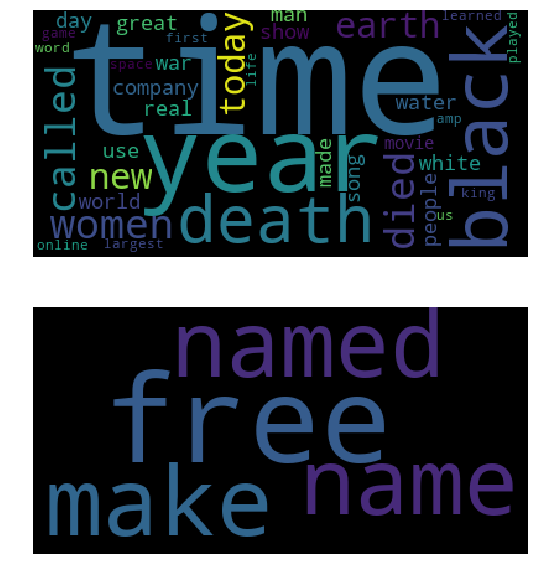

In [20]:
plt.figure()
# two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(15,10))
ax1.imshow(popular_wordcloud)
ax1.axis("off")
ax1.figsize=(15,10)
ax2.imshow(notpopular_wordcloud)
ax2.axis("off")

plt.axis("off")
plt.show()